## <mark>Importing keras libraries</mark>






In [ ]:
import os
from shutil import copy2
import csv

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow_hub as hub

In [ ]:
tf.__version__

'2.4.1'

### Setting up the pandas display decimal option

By default the numerical values in data frame are stored up to 6 decimals only. How do I get the full precision.

For example
34.98774564765 is stored as 34.987746. I do want the full value

**`For setting the decimal value to 8 we used the below lines of code`**

In [ ]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

### Load the dataset

**how to use the data ?**
* download the dataset from kaggle : https://www.kaggle.com/positivepc/object-detection
* mount your google drive with Google Colab
* upload the zip file to the drive.. (zip file upload because the zip file is comprised so uploading will take less time
* unzip the dataset from drive to your colab.. (using belowe line of code)

In [ ]:
!unzip '/content/drive/MyDrive/archive (2)' -d '/content/'

**store the dataset path to the variable data_root**

In [ ]:
data_root = ("/content/training_set/Training_set")

### Prepairing dataset for the training
* give 224x224 size to the image... because we are training our data with `mobilenet` pre-trained model and pre-trained mobile are trained by `ImageNet` datasets and `imagenet dataset dimensions are 224, 224`, that why we assigned 224x224
* stored dataset path to the `TRAINING_DATA_DIR` variable
* since our full data is stored in a variable to we set a varibale with parameters `rescale=1./255` that because we that to normalized our full data, and we set `validation_split=.20` to split `20 percent` of the data for testing.
* assigned that variable to the `ImageDataGenerator`. ImageDatagenerator will check the `datagen_kwargs` and well get the parameters from that variable
* we split our data into train and test sets.. so we get our splited testing data which is 20%... `flow_from_directory` function will pick images and will assigned labels for that images..
* ⚠ remember.. the dataset directoris structure should looks like this. for getting labels
<img src='https://miro.medium.com/max/700/0*wl6rLXC0wNL27fnd.png'>

In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 296 images belonging to 2 classes.
Found 1190 images belonging to 2 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 2))

### setting up for classes
**how many classes you have in your dataset?**
* here we assigned class number to our images
* we have 2 classes so we gives 0 and 1 to our classes.. this is because our model should know which image belong to which class.

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'electric bus': 0, 'electric car': 1}


In [ ]:
!cat labels.txt

electric bus
electric car

In [ ]:
IMAGE_SIZE = 224

### Downloading our `MobileNet_v2` model from tensorflow hub
> setting up the layers inside our models for our requiredments

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

## train the model

In [ ]:
model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['acc'])

### Train the model
# 😆😆😅

just kidding guys..
we just compile our model in the upper cell
training will start by executing the below cell

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=100,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/100
38/38 [==============================] - 41s 152ms/step - loss: 0.3342 - acc: 0.8664 - val_loss: 0.0471 - val_acc: 0.9865
Epoch 2/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0438 - acc: 0.9894 - val_loss: 0.0311 - val_acc: 0.9899
Epoch 3/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0414 - acc: 0.9834 - val_loss: 0.0214 - val_acc: 0.9932
Epoch 4/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0330 - acc: 0.9919 - val_loss: 0.0249 - val_acc: 0.9966
Epoch 5/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0201 - acc: 0.9930 - val_loss: 0.0190 - val_acc: 0.9966
Epoch 6/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0179 - acc: 0.9977 - val_loss: 0.0153 - val_acc: 0.9932
Epoch 7/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0141 - acc: 0.9973 - val_loss: 0.0143 - val_acc: 0.9966
Epoch 8/100
38/38 [==============================] - 5s 119ms/step -

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

10/10 [==============================] - 1s 77ms/step - loss: 0.0188 - acc: 0.9966
Final loss: 0.02
Final accuracy: 99.66%


## Ploting our Accuracy and Loss

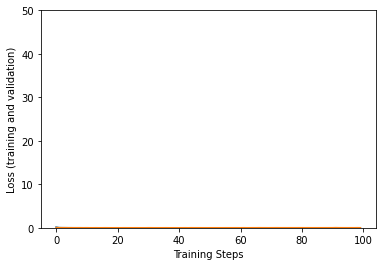

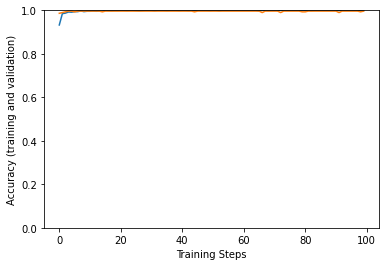

In [ ]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

### testing our model

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Electric Bus' 'Electric Car']


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 2)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Electric Car' 'Electric Car' 'Electric Bus' 'Electric Car'
 'Electric Bus' 'Electric Car' 'Electric Bus' 'Electric Car'
 'Electric Car' 'Electric Bus' 'Electric Car' 'Electric Car'
 'Electric Car' 'Electric Car' 'Electric Bus' 'Electric Bus'
 'Electric Car' 'Electric Bus' 'Electric Car' 'Electric Car'
 'Electric Bus' 'Electric Car' 'Electric Car' 'Electric Car'
 'Electric Car' 'Electric Car' 'Electric Bus' 'Electric Bus'
 'Electric Bus' 'Electric Bus' 'Electric Car' 'Electric Car']


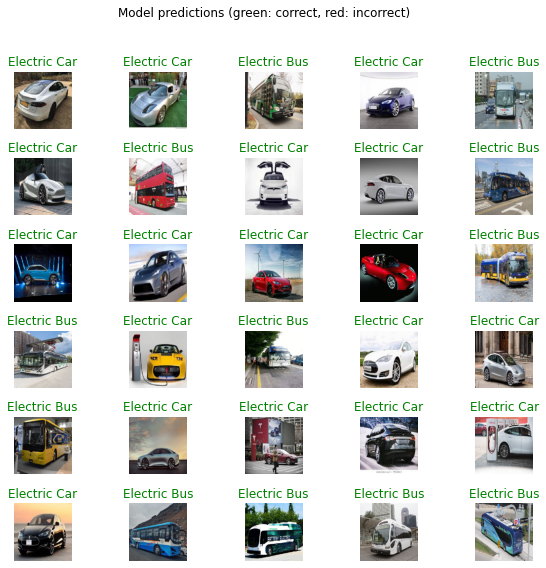

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")